<a href="https://colab.research.google.com/github/ENGS-108-Fall-23/assignment_3_Fall2023-Filip-Nowicki/blob/main/submission_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM and TensorFlow**



In [1]:
''' Import Statements '''
import os
import csv
import json
import pickle
import tqdm
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Loading
 we will be using the Yoga Postures Dataset from [Kaggle](https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset) and will use the following code blocks to download the dataset directly to your Google Drive.

## Creating a Kaggle API Token
First we will need to download an API token from Kaggle in order to download the dataset, so our first step is to create a Kaggle account if you don't already have one.
1. Create a Kaggle account by following the sign up instructions [here](https://www.kaggle.com/).
2. Log into your Kaggle account and click your account icon on the upper righthand side.
3. Then select **Account** from the dropdown/sidebar menu.
4. Scroll down to the **API** section and select **Create New API Token**.
5. This will download a JSON file called kaggle.json to your Downloads folder on your computer.
6. Now run the following code block and when the **Browse** button appears, click it and select that kaggle.json file.

In [2]:
# Run this code block after creating a Kaggle API token as instructed above.
! pip install -q kaggle
from google.colab import files

# Will ask you to upload kaggle.json file and remove any old ones.
if os.path.exists('kaggle.json'):
  os.remove('kaggle.json')
files.upload()

# Will create the appropriate directory structure
if not os.path.exists('/root/.kaggle'):
  ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Downloading the Dataset

7. Now we have downloaded our Kaggle credentials we can now download the Yoga Postures Dataset (or any other Kaggle dataset for that matter) directly into our Google Drive.

In [3]:
# Will ensure a train directory exists in your home and will create if it doesn't exist.
if not os.path.exists('train'):
  os.mkdir('train')
# Will download the yoga postures dataset zip file if it does not exist in the train directory.
if not os.path.exists('train/yoga-posture-dataset.zip'):
  ! kaggle datasets download -p train tr1gg3rtrash/yoga-posture-dataset
# Will check to see if the yoga postures zip file has been unzipped and will unzip the file if not.
if not os.path.exists('train/Poses.json'):
  ! unzip train/yoga-posture-dataset.zip -d train

# To remove train folder and redownload uncomment the code below
#!rm -rf train

 99% 444M/447M [00:24<00:00, 20.9MB/s]
100% 447M/447M [00:24<00:00, 18.8MB/s]
Archive:  train/yoga-posture-dataset.zip
  inflating: train/Adho Mukha Svanasana/File1.png  
  inflating: train/Adho Mukha Svanasana/File10.png  
  inflating: train/Adho Mukha Svanasana/File11.png  
  inflating: train/Adho Mukha Svanasana/File12.png  
  inflating: train/Adho Mukha Svanasana/File13.png  
  inflating: train/Adho Mukha Svanasana/File14.png  
  inflating: train/Adho Mukha Svanasana/File15.png  
  inflating: train/Adho Mukha Svanasana/File16.png  
  inflating: train/Adho Mukha Svanasana/File17.png  
  inflating: train/Adho Mukha Svanasana/File18.png  
  inflating: train/Adho Mukha Svanasana/File19.png  
  inflating: train/Adho Mukha Svanasana/File2.png  
  inflating: train/Adho Mukha Svanasana/File20.png  
  inflating: train/Adho Mukha Svanasana/File21.png  
  inflating: train/Adho Mukha Svanasana/File22.png  
  inflating: train/Adho Mukha Svanasana/File23.png  
  inflating: train/Adho Mukha Svana

## Viewing the Dataset Metadata
Now let's inspect the dataset metadata, i.e. the information about each of the training examples, which is located in the Poses.json file.

In [5]:
# Let's load the yoga postures metadata
import json
with open('train/Poses.json', 'r') as metafile:
  metadata = json.load(metafile)
metadata = pd.DataFrame.from_dict(metadata['Poses'])
metadata.head()

,id,sanskrit_name,english_name,img_url
0,1,Navasana,Boat,https://www.dropbox.com/s/4m64ztxkj8a4dab/boat...
1,2,Ardha Navasana,Half-Boat,https://www.dropbox.com/s/1nx0r94msxjwvyp/boat...
2,3,Dhanurasana,Bow,https://www.dropbox.com/s/wizj5kwxvez4c0a/bow....
3,4,Setu Bandha Sarvangasana,Bridge,https://www.dropbox.com/s/f1w64ybg4sn8ejt/brid...
4,5,Baddha Konasana,Butterfly,https://www.dropbox.com/s/3h2pts6xbn28dh7/butt...


## Pre-Problem: Segmenting Out the Test Data and Copying to Google Drive
There is a file called **test_images.csv**. This file holds all of the image paths that you are **NOT** allowed to use during *training*. Therefore, what we are going to do in this pre-problem is remove all the testing images from your train data folder. *Hint:* You naturally are still allowed/should use the test data to evaluate your model moving foward, you're just not allowed to use these images during training.

### Task 1
Using the code available in the Data loading section as a reference, write a command using the "!" colab operator to create a new directory called **test**.

In [6]:
#TODO: Write one line of code to make a new directory called test (You might need to refresh your files view to see the change)
! mkdir test

### Task 2
Upload your **test_images.csv** file by running the following code block.

In [7]:
files.upload()

Saving test_images.csv to test_images.csv


{'test_images.csv': b'Virabhadrasana Two/File41.png\r\nVirabhadrasana Two/File15.png\r\nVirabhadrasana Two/File49.png\r\nVirabhadrasana Two/File36.png\r\nVirabhadrasana Two/File29.png\r\nVirabhadrasana Two/File34.png\r\nVirabhadrasana Two/File14.png\r\nVirabhadrasana Two/File61.jpeg\r\nVirabhadrasana Two/File25.png\r\nVirabhadrasana Two/File28.png\r\nVirabhadrasana Two/File44.png\r\nVirabhadrasana Two/File13.png\r\nUpavistha Konasana/File8.jpeg\r\nUpavistha Konasana/File3.jpeg\r\nUpavistha Konasana/File6.jpeg\r\nSetu Bandha Sarvangasana/File65.jpeg\r\nSetu Bandha Sarvangasana/File60.jpg\r\nSetu Bandha Sarvangasana/File41.png\r\nSetu Bandha Sarvangasana/File50.jpg\r\nSetu Bandha Sarvangasana/File6.png\r\nSetu Bandha Sarvangasana/File23.png\r\nSetu Bandha Sarvangasana/File13.png\r\nSetu Bandha Sarvangasana/File48.jpg\r\nSetu Bandha Sarvangasana/File12.png\r\nSetu Bandha Sarvangasana/File15.png\r\nSetu Bandha Sarvangasana/File68.jpeg\r\nSetu Bandha Sarvangasana/File17.png\r\nSetu Bandha S

### Task 3
Now let's write some code to copy over all these test images into the test folder we created as well as removing them from the train folder.

In [8]:
# First let's load the test_images.csv file
with open('test_images.csv', 'r') as f_:
  reader = csv.reader(f_)
  test_image_paths = []
  for row in reader:
    test_image_paths.append(row[0])

In [9]:
# TODO: Now using these test image paths, copy over these files to the test directory and remove them from the train directory

folder_list = os.listdir('train')
folder_list.remove('Poses.json')

for folder_name in folder_list:
  folder_path = '/content/test/' + folder_name + '/'
  os.mkdir(folder_path)

for test_path in test_image_paths:
  # Do something... (hint see cp and rm commands using the colab terminal, i.e. the "!" operator)
  src = '/content/train/' + test_path
  dest = '/content/test/' + test_path
  os.system(f'cp {src} {dest}')
  os.system(f'rm {src}')

# Problem 1: Support Vector Machine Classification
In this problem, you will be building support vector machines for some cool classification tasks.

## Task 1: Synthetic Data
 In this part we will be exploring the *circles* dataset. This dataset is avialable as a pickle file labeled *circles.pk* in your repository under datasets. In this dataset you will have an $X$ array of 2 dimensional samples of the form $(x_1, x_2)$ and a $y$ array of each samples associated label.

### Part A
Go through the circles dataset and create a scatterplot of the circles data using the y label as each sample's color to designate their respective class.

In [17]:
# TODO: Change me
CIRCLES_DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/circles.pk'

# TODO: Load the dataset using pickle load
with open(CIRCLES_DATASET_PATH, 'rb') as circles_file:
  # TODO: Load here...
  circles = pickle.load(circles_file)

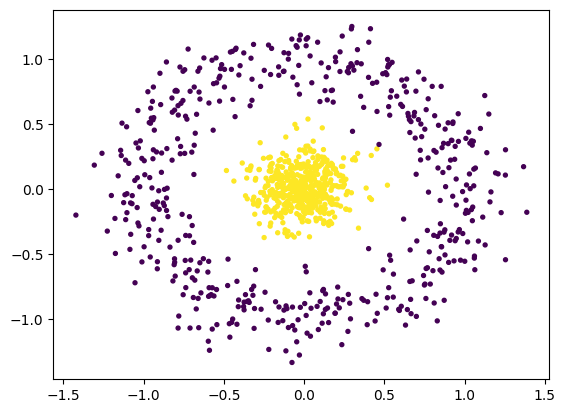

In [18]:
X, y = circles
# TODO: Graph the data
plt.scatter(X[:, 0], X[:, 1], c = y, s = 8)

### Part B
Is this dataset linearly seperable? Explain why or why not?

**TODO:** The dataset is not linearly separable. Linear separation means there exists a line which can separate the datapoints of different classes. In this case, the datapoints of one class are entirely surrounded by the datapoints of another class, and so no such line can be drawn.

### Part C
Can you think of a transformation that can be applied to this dataset that could make it linearly seperable? If so, define what these transformation function(s) might look like, and if not explain why. *Hint: Think of a higher dimensional space.*

**TODO:** Yes, there exists such a transormation and it could be the sum of X1 to the power of 2 and X2 to the power of 2.

### Part D
If you where able to find a transformation in (Part C), create a suitable graph showing that the dataset is linearly seperable in this new feature space.

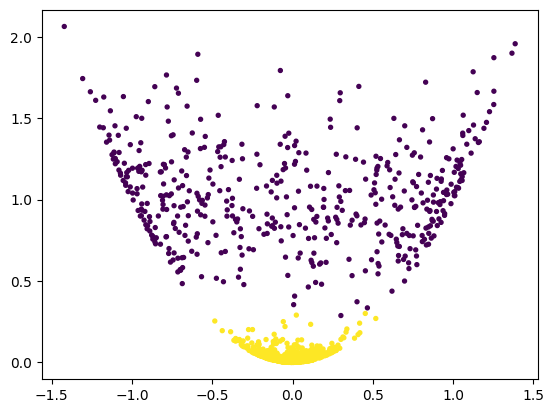

In [19]:
#TODO: Your code goes here.
X_trans = X[:, 0]**2 + X[:, 1]**2

plt.scatter(X[:, 0], X_trans, c = y, s = 8)

## Task 2: Yoga Pose Classification
What we accomplished in Part 1 is known as the kernel trick for SVMs. Now let's focus on how we can use this idea to accomplish non-linear classification on a real world dataset. In this next part  we will be using a yoga postures dataset. These images are PNG and JPEG images with many pixels.

### Part A
You have been given a number of code skeletons throughout the course all of which load and preprocess the data for you. In this excerise tho, we will be doing the data loading manually as it is an important skill to learn. Write some code that will walk through the *Yoga Postures Dataset* directory structure and build a single large numpy array (Make sure to resize the image to something like (28, 28) or (32, 32) for the SVM and at minimum (71, 71) for the deep learning tasks) *Hint: You have been provided with a basic skeleton, study the operations of the code and finish the script.*

In [ ]:
from PIL import Image

# TODO: Change Me
PATH_TO_YOGA_TRAIN_DATA = '/content/train/'
PATH_TO_YOGA_TEST_DATA = '/content/test/'

# The dimensions of the resized image
RESIZE = (71,71)
# A map from integer ids to yoga pose categories (strings)
pose_map = {}
# The data lists that we will be filling in.
X_train, y_train, X_train_flat = [], [], []

# Let's start our for loop (Just using tqdm to give us a pretty progress bar).
class_id = 0
for subfold in tqdm.tqdm(os.listdir(PATH_TO_YOGA_TRAIN_DATA), desc='Processing training images', leave=False):
  if os.path.isdir(os.path.join(PATH_TO_YOGA_TRAIN_DATA, subfold)):
    # We have found image class folder so let's extract all example data
    pose_map[class_id] = subfold
    for img_name in os.listdir(os.path.join(PATH_TO_YOGA_TRAIN_DATA, subfold)):
      #TODO: Preprocess and load image
      #HINT: PNGs will have 4 channels and JPEGs will have 3 (THIS WILL CAUSE ISSUES!).
      # Try to figure out what to do with this 4th channel. It could be as simple as deleting it...
      img_path = PATH_TO_YOGA_TRAIN_DATA + subfold + '/' + img_name
      img = Image.open(img_path)
      img = img.resize(RESIZE)
      img = np.array(img)

      if len(np.shape(img)) == 2:
        img = np.repeat(img[:, :, np.newaxis], 3, 2)

      elif np.shape(img)[2] == 2:
        img = img[:, :, 0]
        img = np.repeat(img[:, :, np.newaxis], 3, 2)

      elif np.shape(img)[2] == 4:
        img = img[:, :, :3]

      img = img / 255

      X_train.append(img)
      X_train_flat.append(img.flatten())
      y_train.append(class_id)

    class_id += 1

# Let's load in the training data as well using the same methodology but with the pose_map built during the training data collection.
pose_map_reverse = {pose: class_id for class_id, pose in pose_map.items()}
X_test, y_test, X_test_flat = [], [], []
for subfold in tqdm.tqdm(os.listdir(PATH_TO_YOGA_TEST_DATA), desc='Processing test images', leave=False):
  if os.path.isdir(os.path.join(PATH_TO_YOGA_TEST_DATA, subfold)):
    # We have found image class folder so let's extract all example data
    class_id = pose_map_reverse[subfold]
    for img_name in os.listdir(os.path.join(PATH_TO_YOGA_TEST_DATA, subfold)):
      #TODO: Preprocess and load image
      img_path = PATH_TO_YOGA_TEST_DATA + subfold + '/' + img_name
      img = Image.open(img_path)
      img = img.resize(RESIZE)
      img = np.array(img)

      if len(np.shape(img)) == 2:
        img = np.repeat(img[:, :, np.newaxis], 3, 2)

      elif np.shape(img)[2] == 2:
        img = img[:, :, 0]
        img = np.repeat(img[:, :, np.newaxis], 3, 2)

      elif np.shape(img)[2] == 4:
        img = img[:, :, :3]

      img = img / 255

      X_test.append(img)
      X_test_flat.append(img.flatten())
      y_test.append(class_id)

### Part B
Implement a SVM classifer using sklearn and report your classification results on the testing dataset. Make sure to flatten your X data from the three channels before passing into the SVM.

In [ ]:
#TODO: Build and fit your SVM classifier and print your classification report
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score

X_train_input = np.vstack(X_train_flat)
X_test_input = np.vstack(X_test_flat)

model = svm.SVC()
model.fit(X_train_input, y_train)
y_test_pred = model.predict(X_test_input)
f1 = f1_score(y_test, y_test_pred, average = 'macro')
acc = accuracy_score(y_test, y_test_pred)

print('The accuracy is:', round(acc, 2), 'and the F1 score is:', round(f1, 2), 'on the test set.')

The accuracy is: 0.41 and the F1 score is: 0.35 on the test set.


# Problem 2: Introduction to TensorFlow
In this problem, we will start working in tensorflow to build deep learning systems starting with fully-connected (FC) and convolutional (CNN) neural networks. We will focus on using the yoga postures dataset, ending this problem with a small class competition that may come with a prize...

## Task 1: A Fully-Connected Neural Network

### Part A
Using the yoga postures dataset, build a [tensorflow Data Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) that is shuffled with a batch size of 10. *Hint: We did this in class.*

In [ ]:
#TODO: Your code goes here.
batch_size = 10

train_df = tf.data.Dataset.from_tensor_slices((X_train_flat, tf.one_hot(y_train, 47)))
train_df = train_df.shuffle(buffer_size=len(X_train_flat)).batch(batch_size)

### Part B
Build a two layer fully connected neural network of any size with a ReLu activation function and a final softmax layer.

In [ ]:
#TODO: Your code goes here. Make sure to add a Flatten layer first with the correct input shape.
nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(np.shape(X_train_flat[0])[0],)),
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=47, activation='softmax')
])

### Part C
Compile your model with an appropriate loss function and optimizer. Briefly describe your choices.

In [ ]:
#TODO: Your code goes here.
nn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

The adam optimizer, being the state of the art, is used as the optimizer. Then, in terms of the loss function, this is a classification problem, which makes cross entropy suitable. Since I did no conversion of the labels to
SparseCategoricalCrossentropy

### Part D
Train your model on the yoga pose training dataset. And report your accuracy on the testing dataset.

In [ ]:
#TODO: Your code goes here. Hint: It's ok if the accuracy is not the best...
nn.fit(train_df, epochs=30)

Epoch 1/30
223/223 [==============================] - 5s 21ms/step - loss: 3.4693 - categorical_accuracy: 0.0776
Epoch 2/30
223/223 [==============================] - 5s 19ms/step - loss: 3.4878 - categorical_accuracy: 0.0812
Epoch 3/30
223/223 [==============================] - 3s 14ms/step - loss: 3.4453 - categorical_accuracy: 0.0852
Epoch 4/30
223/223 [==============================] - 3s 14ms/step - loss: 3.4209 - categorical_accuracy: 0.0888
Epoch 5/30
223/223 [==============================] - 4s 15ms/step - loss: 3.4442 - categorical_accuracy: 0.0839
Epoch 6/30
223/223 [==============================] - 3s 14ms/step - loss: 3.4290 - categorical_accuracy: 0.0897
Epoch 7/30
223/223 [==============================] - 3s 14ms/step - loss: 3.4211 - categorical_accuracy: 0.0866
Epoch 8/30
223/223 [==============================] - 3s 14ms/step - loss: 3.4217 - categorical_accuracy: 0.0870
Epoch 9/30
223/223 [==============================] - 3s 15ms/step - loss: 3.3955 - categorical_

In [ ]:
test_loss, test_acc = nn.evaluate(tf.data.Dataset.from_tensor_slices((X_test_flat, tf.one_hot(y_test, 47))).batch(batch_size))

53/53 [==============================] - 1s 5ms/step - loss: 3.6708 - categorical_accuracy: 0.0775


## Task 2: A Convolutional Neural Network
CNNs perform notoriously well on image classification tasks, so we will study a simple implementation of this network and let you guys compete to see who finds the best architecture.

### Part A: Vanilla CNN
Build, compile, and fit a CNN with the following network structure:
* A total of 3 convolutional segments consisting of:
  - A convolutional layer with "valid" padding and Relu activation and your choice of kernel size, number of filters and strides,
  - An average pooling layer,
* Then a fully connected layer with 128 neurons with ReLu activations.
* Then a fully connected layer with 64 neurons and ReLu activations.
* And ending with a softmax output layer.



In [ ]:
#TODO: Build, compile and train this network on the yoga pose training data. Maybe this one will be better...
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(71, 71, 3), padding='valid'),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding='valid'),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (7,7), activation='relu', padding='valid'),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=47, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 34, 34, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        51264     
                                                                 
 average_pooling2d_1 (Avera  (None, 15, 15, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          200768    
                                                                 
 average_pooling2d_2 (Avera  (None, 4, 4, 64)         

In [ ]:
# Data prep

batch_size = 10

cnn_train_df = tf.data.Dataset.from_tensor_slices((X_train, tf.one_hot(y_train, 47)))
cnn_train_df = cnn_train_df.shuffle(buffer_size=len(X_train)).batch(batch_size)
cnn_test_df = tf.data.Dataset.from_tensor_slices((X_test, tf.one_hot(y_test, 47))).batch(batch_size)

In [ ]:
cnn.fit(cnn_train_df, epochs = 25)

Epoch 1/25
223/223 [==============================] - 10s 9ms/step - loss: 3.8178 - categorical_accuracy: 0.0319
Epoch 2/25
223/223 [==============================] - 2s 9ms/step - loss: 3.6405 - categorical_accuracy: 0.0709
Epoch 3/25
223/223 [==============================] - 1s 6ms/step - loss: 3.0327 - categorical_accuracy: 0.2046
Epoch 4/25
223/223 [==============================] - 1s 5ms/step - loss: 2.5062 - categorical_accuracy: 0.3315
Epoch 5/25
223/223 [==============================] - 1s 5ms/step - loss: 2.0767 - categorical_accuracy: 0.4392
Epoch 6/25
223/223 [==============================] - 1s 5ms/step - loss: 1.6660 - categorical_accuracy: 0.5325
Epoch 7/25
223/223 [==============================] - 1s 5ms/step - loss: 1.3591 - categorical_accuracy: 0.6205
Epoch 8/25
223/223 [==============================] - 1s 5ms/step - loss: 1.0923 - categorical_accuracy: 0.6869
Epoch 9/25
223/223 [==============================] - 2s 7ms/step - loss: 0.8688 - categorical_accuracy

In [ ]:
cnn_test_loss, cnn_test_acc = cnn.evaluate(cnn_test_df)

53/53 [==============================] - 0s 4ms/step - loss: 4.5851 - categorical_accuracy: 0.4820


### Part B: Transfer Learning
Now we are going to steal from a state-of-the-art [Xception](https://arxiv.org/abs/1610.02357) model. Luckily, tensorflow has this directly available to us and we are going to use transfer learning to tune this SoA model to our dataset. Therefore, run the following code block to build our base Xception model:

In [ ]:
# I'll setup your base model for you.
from tensorflow.keras.applications import Xception

base_model = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(71,71,3)
)
base_model.trainable=False

83683744/83683744 [==============================] - 1s 0us/step


Now create a new model with this *base_model* as our first layer followed by:
* Global average pooling layer,
* A Dense layer with 256 neurons and ReLu activations,
* A 40% Dropout layer,
* A softmax output layer.

Then fit this model on 30 epochs.

In [ ]:
#TODO: Finish the model
model = tf.keras.Sequential([
    base_model,
    #TODO: Add other layers
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=47, activation='softmax')
])

#TODO: Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 47)                12079     
                                                                 
Total params: 21398103 (81.63 MB)
Trainable params: 536623 (2.05 MB)
Non-trainable params: 20861480 (79.58 MB)
_________

In [ ]:
#TODO: Fit the model on 30 epochs
model.fit(cnn_train_df, epochs = 30)

Epoch 1/30
223/223 [==============================] - 8s 12ms/step - loss: 3.3229 - categorical_accuracy: 0.1745
Epoch 2/30
223/223 [==============================] - 3s 11ms/step - loss: 2.3332 - categorical_accuracy: 0.3764
Epoch 3/30
223/223 [==============================] - 3s 13ms/step - loss: 1.7583 - categorical_accuracy: 0.5218
Epoch 4/30
223/223 [==============================] - 3s 13ms/step - loss: 1.4399 - categorical_accuracy: 0.5913
Epoch 5/30
223/223 [==============================] - 3s 12ms/step - loss: 1.1815 - categorical_accuracy: 0.6752
Epoch 6/30
223/223 [==============================] - 3s 11ms/step - loss: 0.9669 - categorical_accuracy: 0.7263
Epoch 7/30
223/223 [==============================] - 3s 11ms/step - loss: 0.7524 - categorical_accuracy: 0.7806
Epoch 8/30
223/223 [==============================] - 3s 12ms/step - loss: 0.6487 - categorical_accuracy: 0.8120
Epoch 9/30
223/223 [==============================] - 3s 12ms/step - loss: 0.6226 - categorical_

In [ ]:
loss, acc = model.evaluate(cnn_test_df)

53/53 [==============================] - 2s 14ms/step - loss: 2.7682 - categorical_accuracy: 0.5085


### Part C: Build your Own Model
So know that you know the range of accuracies between poorly built models and state-of-the-art models like Xception, can you improve on them? Attempt to build your own deep neural network architecture and see if you can do better than the base CNN model presented above or better yet the Xception model we transfer learned. You may use any architecture or configuration you like.

In [ ]:
#TODO: Build and train your custom model and evaluate on the test data.
#TODO: Build, compile and train this network on the yoga pose training data. Maybe this one will be better...
own_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(71, 71, 3), padding='valid'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=47, activation='softmax')
])

own_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

own_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 69, 69, 32)        896       
                                                                 
 conv2d_26 (Conv2D)          (None, 67, 67, 32)        9248      
                                                                 
 average_pooling2d_12 (Aver  (None, 33, 33, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_27 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 average_pooling2d_13 (Aver  (None, 14, 14, 64)        0         
 agePooling2D)                                        

In [ ]:
# Data prep
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# batch_size = 10

# cnn_train_df = tf.data.Dataset.from_tensor_slices((X_train, tf.one_hot(y_train, 47)))
# cnn_train_df = cnn_train_df.shuffle(buffer_size=len(X_train)).batch(batch_size)
# cnn_test_df = tf.data.Dataset.from_tensor_slices((X_test, tf.one_hot(y_test, 47))).batch(batch_size)


X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
y_train_onehot = tf.keras.utils.to_categorical(y_train_np, 47)

datagen = ImageDataGenerator(
    rotation_range=20,       # Degree range for random rotations
    width_shift_range=0.15,   # Range for random horizontal shifts
    height_shift_range=0.15,  # Range for random vertical shifts
    shear_range=0.1,         # Range for random shear
    zoom_range=0.2,          # Range for random zoom
    horizontal_flip=True,    # Randomly flip inputs horizontally
    fill_mode='nearest'      # Strategy to fill points outside boundaries
)

train_generator = datagen.flow(
    X_train_np,
    y_train_onehot,          # Use y_train if you didn't one-hot encode
    batch_size=16
)

In [ ]:
own_cnn.fit(train_generator, epochs = 60)

Epoch 1/60
140/140 [==============================] - 6s 28ms/step - loss: 3.8019 - categorical_accuracy: 0.0287
Epoch 2/60
140/140 [==============================] - 4s 28ms/step - loss: 3.7741 - categorical_accuracy: 0.0319
Epoch 3/60
140/140 [==============================] - 4s 28ms/step - loss: 3.7650 - categorical_accuracy: 0.0323
Epoch 4/60
140/140 [==============================] - 6s 42ms/step - loss: 3.7669 - categorical_accuracy: 0.0328
Epoch 5/60
140/140 [==============================] - 4s 28ms/step - loss: 3.7556 - categorical_accuracy: 0.0314
Epoch 6/60
140/140 [==============================] - 6s 42ms/step - loss: 3.7418 - categorical_accuracy: 0.0458
Epoch 7/60
140/140 [==============================] - 4s 28ms/step - loss: 3.6567 - categorical_accuracy: 0.0677
Epoch 8/60
140/140 [==============================] - 6s 41ms/step - loss: 3.5267 - categorical_accuracy: 0.0870
Epoch 9/60
140/140 [==============================] - 4s 30ms/step - loss: 3.3864 - categorical_

In [ ]:
loss, acc = own_cnn.evaluate(cnn_test_df)

53/53 [==============================] - 0s 5ms/step - loss: 1.5321 - categorical_accuracy: 0.6238
